In [17]:
import matplotlib.style
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('Solarize_Light2')


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [19]:
train['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

In [4]:
train.info

<bound method DataFrame.info of       Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...

In [5]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [7]:
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

<Axes: xlabel='City Group', ylabel='revenue'>

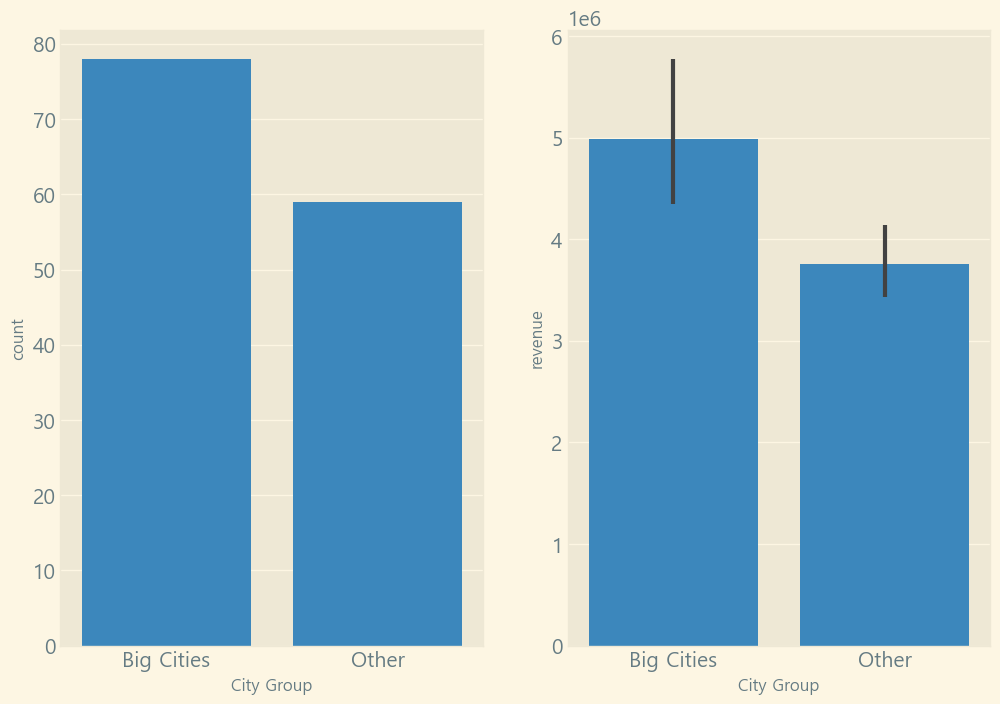

In [18]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,8)

sns.countplot(x='City Group',data=train,ax=ax[0])

sns.barplot(x='City Group',y='revenue',data=train,ax=ax[1])

In [20]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

<Axes: xlabel='Type', ylabel='revenue'>

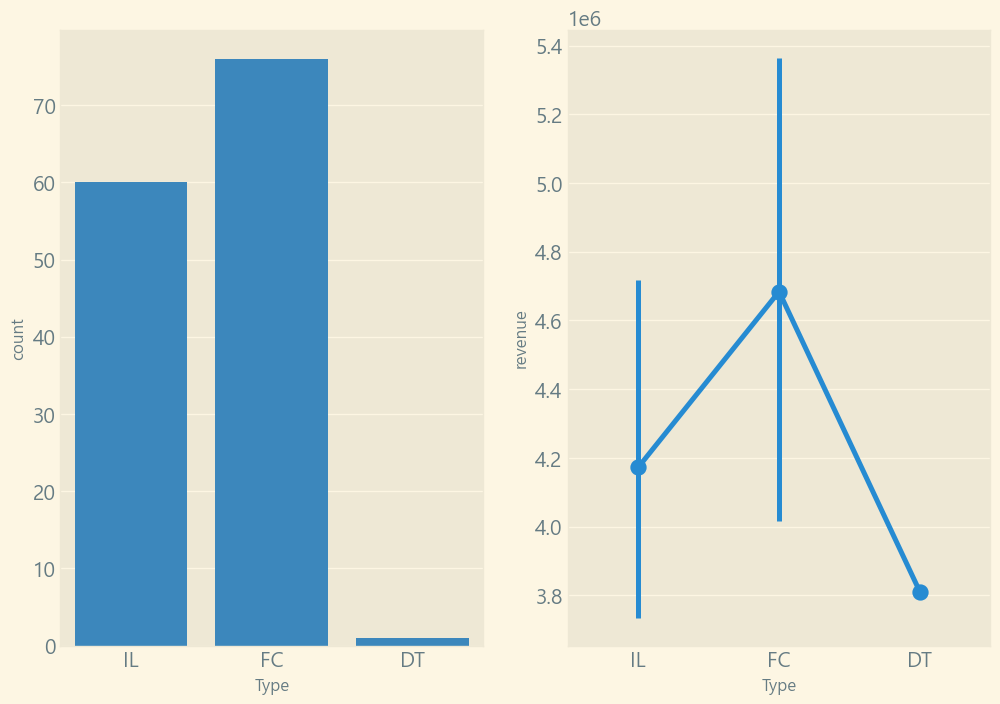

In [25]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,8)

sns.countplot(x='Type',data=train,ax=ax[0])

sns.pointplot(x='Type',y='revenue',data=train,ax=ax[1])


<Axes: xlabel='Type', ylabel='count'>

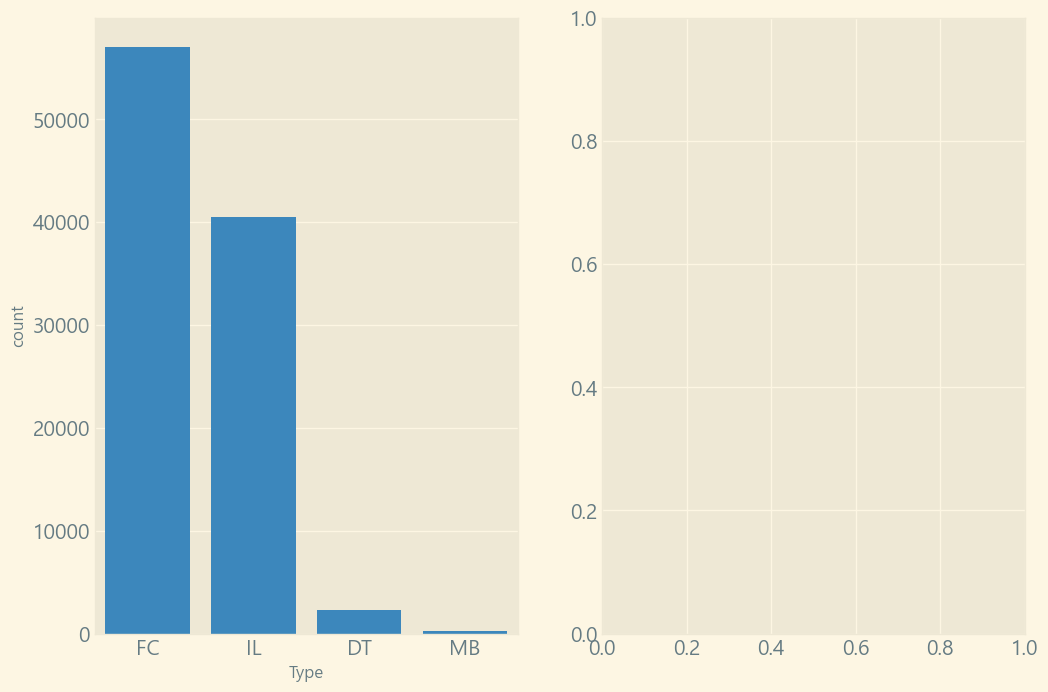

In [55]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,8)

sns.countplot(x='Type',data=test,ax=ax[0])

푸드코드가 많고 매출도 더 높다

In [26]:
train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [31]:
train['Open Date']=pd.to_datetime(train['Open Date'])
test['Open Date']=pd.to_datetime(test['Open Date'])

In [32]:
train['year']=train['Open Date'].dt.year
train['month']=train['Open Date'].dt.month
train['day']=train['Open Date'].dt.day
train['dayofweek']=train['Open Date'].dt.dayofweek



1999~2000년대에 수익이 높고, 주말에 매출이 평균적으로 더 높다

<Axes: xlabel='dayofweek', ylabel='revenue'>

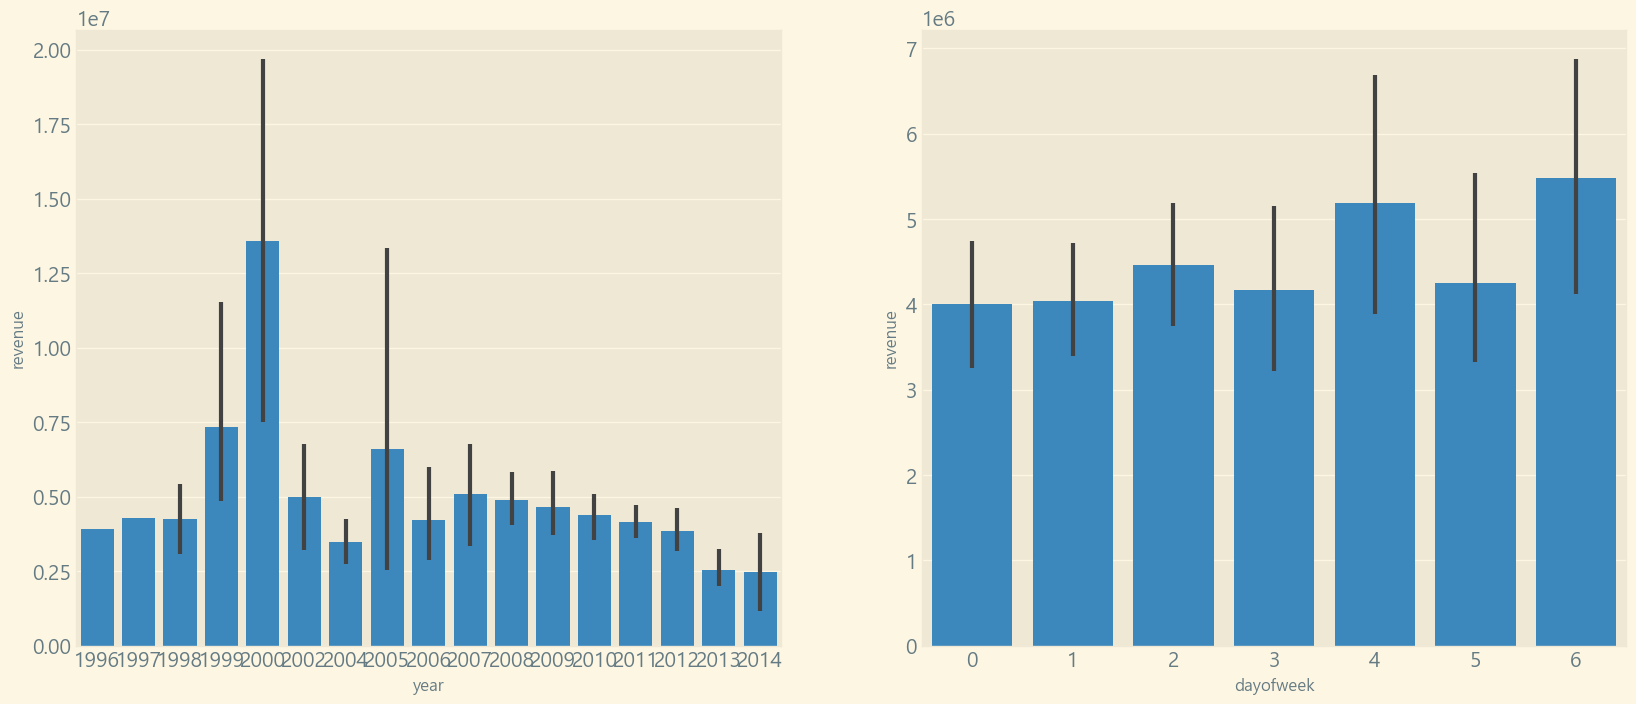

In [40]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
sns.barplot(x='year',y='revenue',data=train,ax=ax[0])
sns.barplot(x='dayofweek',y='revenue',data=train,ax=ax[1])

In [42]:
train['P1'].value_counts()

2     36
4     35
3     31
12    12
1      9
6      6
9      4
5      4
Name: P1, dtype: int64

<Axes: xlabel='P6', ylabel='revenue'>

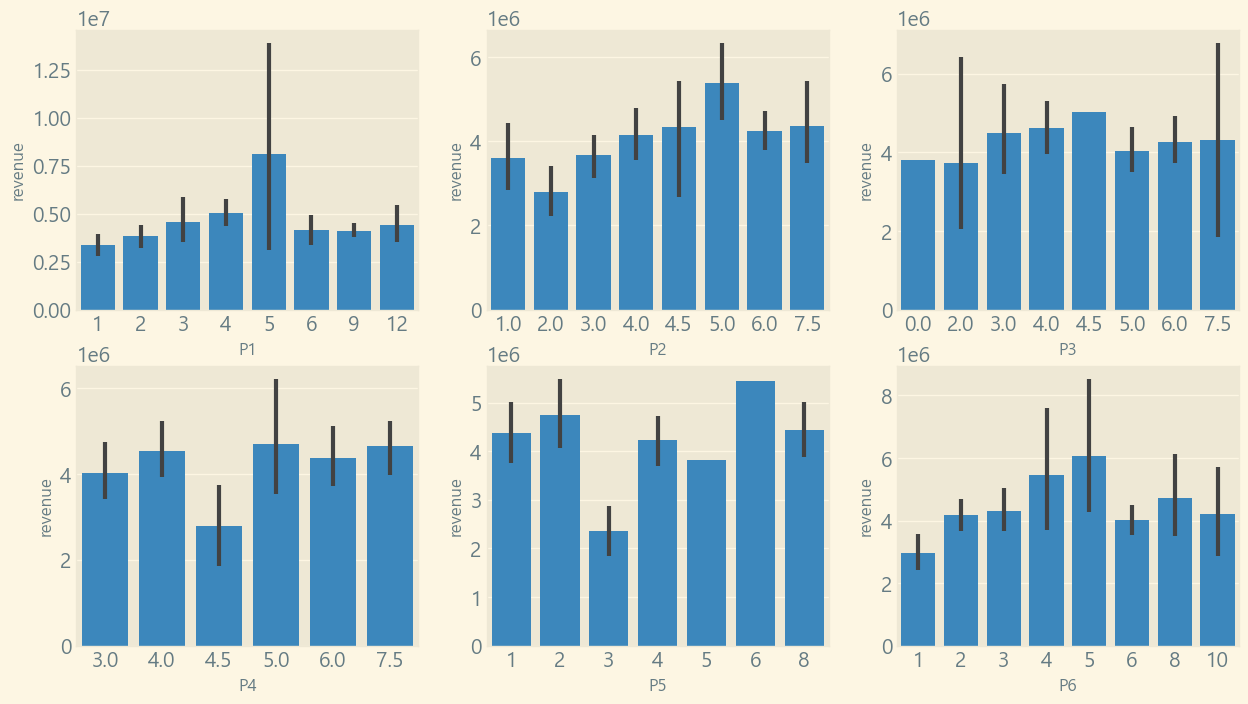

In [51]:
fig,ax = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15,8)
sns.barplot(x='P1',y='revenue',data=train,ax=ax[0][0])
sns.barplot(x='P2',y='revenue',data=train,ax=ax[0][1])
sns.barplot(x='P3',y='revenue',data=train,ax=ax[0][2])
sns.barplot(x='P4',y='revenue',data=train,ax=ax[1][0])
sns.barplot(x='P5',y='revenue',data=train,ax=ax[1][1])
sns.barplot(x='P6',y='revenue',data=train,ax=ax[1][2])

<Axes: xlabel='revenue', ylabel='Count'>

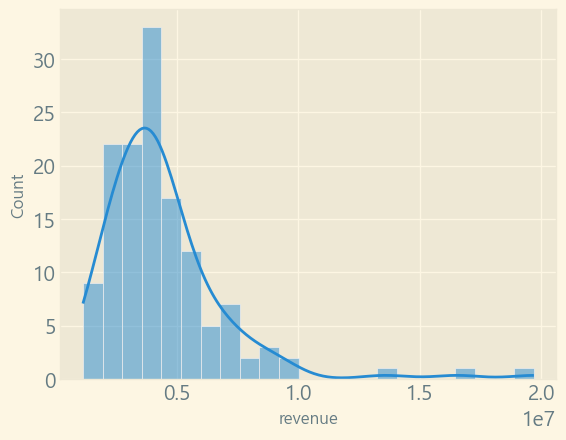

In [52]:
sns.histplot(train['revenue'],kde=True)

In [53]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P33,P34,P35,P36,P37,revenue,year,month,day,dayofweek
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,5,4,3,4,5653753.0,1999,7,17,5
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,6923131.0,2008,2,14,3
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,2055379.0,2013,3,9,5
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,6,18,12,12,6,2675511.0,2012,2,2,3
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,2,3,4,3,3,4316715.0,2009,5,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,5787594.0,2008,6,25,2
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,9262754.0,2006,10,12,3
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,2544857.0,2006,7,8,5
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,7217634.0,2010,10,29,4
